# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            print(app_train[col].head())
            app_train[col] = le.fit_transform(app_train[col]) 
            print(app_train[col].head())
print(app_train.shape)
app_train.head()

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
0    0
1    0
2    1
3    0
4    0
Name: NAME_CONTRACT_TYPE, dtype: int32
0    N
1    N
2    Y
3    N
4    N
Name: FLAG_OWN_CAR, dtype: object
0    0
1    0
2    1
3    0
4    0
Name: FLAG_OWN_CAR, dtype: int32
0    Y
1    N
2    Y
3    Y
4    Y
Name: FLAG_OWN_REALTY, dtype: object
0    1
1    0
2    1
3    1
4    1
Name: FLAG_OWN_REALTY, dtype: int32
(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
app_train['DAYS_EMPLOYED_ANOM']

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [6]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [7]:
# 先做排序
sort_value = app_train.corr()['TARGET'].sort_values(ascending=True)

# 列出最小 15 筆
print("----- 最小 15 筆: -----")
min = sort_value[0:15]
print(min)

# 列出最大 15 筆
print("\n----- 最大 15 筆: -----")
max = sort_value[-15:]
print(max)

----- 最小 15 筆: -----
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

----- 最大 15 筆: -----
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY 

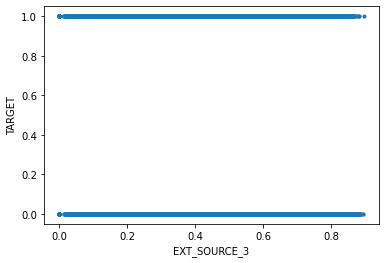

[[nan nan]
 [nan  1.]]
Correlation: nan


In [8]:
# 散佈圖
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()
corr = np.corrcoef(app_train['EXT_SOURCE_3'], app_train['TARGET'])
print(corr)
print("Correlation: %.4f" % (corr[0][1]))

In [9]:
#取絕對值
abs_sort_value = abs(app_train.corr()['TARGET']).sort_values(ascending=True)

# 列出最大 15 筆
print("\n----- 最大 15 筆: -----")
abs_max = abs_sort_value[-15:]
print(abs_max)


----- 最大 15 筆: -----
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED_ANOM             0.045987
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
EXT_SOURCE_1                   0.155317
EXT_SOURCE_2                   0.160472
EXT_SOURCE_3                   0.178919
TARGET                         1.000000
Name: TARGET, dtype: float64


In [10]:
#探討nan出現的原因
corr = np.corrcoef(app_train['EXT_SOURCE_2'], app_train['TARGET'])
print(corr)

[[nan nan]
 [nan  1.]]


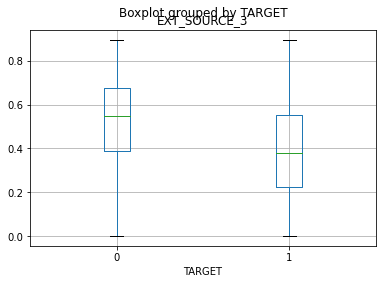

In [11]:
app_train.boxplot(by='TARGET', column='EXT_SOURCE_3')

In [12]:
app_train['EXT_SOURCE_3'].head(20)

0     0.139376
1          NaN
2     0.729567
3          NaN
4          NaN
5     0.621226
6     0.492060
7     0.540654
8     0.751724
9          NaN
10    0.363945
11    0.652897
12    0.176653
13    0.770087
14         NaN
15    0.678568
16    0.062103
17         NaN
18    0.556727
19    0.477649
Name: EXT_SOURCE_3, dtype: float64

In [13]:
app_train['DAYS_LAST_PHONE_CHANGE'].head(20)

0    -1134.0
1     -828.0
2     -815.0
3     -617.0
4    -1106.0
5    -2536.0
6    -1562.0
7    -1070.0
8        0.0
9    -1673.0
10    -844.0
11   -2396.0
12   -2370.0
13      -4.0
14    -188.0
15    -925.0
16      -3.0
17   -2811.0
18    -239.0
19   -1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [14]:
test1 = app_train[['EXT_SOURCE_3', 'TARGET']]

In [15]:
test1_no_na = test1.dropna()
test1_no_na.head(20)

,EXT_SOURCE_3,TARGET
0,0.139376,1
2,0.729567,0
5,0.621226,0
6,0.492060,0
7,0.540654,0
8,0.751724,0
10,0.363945,0
11,0.652897,0
12,0.176653,0
13,0.770087,0


In [16]:
corr = np.corrcoef(test1_no_na['EXT_SOURCE_3'], test1_no_na['TARGET'])
print(corr)

[[ 1.        -0.1789187]
 [-0.1789187  1.       ]]
